In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
df = pd.read_csv('C:/Users/acer/Downloads/TCS_stock_history.csv')

In [5]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0
...,...,...,...,...,...,...,...,...
4458,2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,2320754,0.0,0.0
4459,2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,1673362,0.0,0.0
4460,2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,2253075,0.0,0.0
4461,2021-09-29,3759.800049,3806.000000,3722.149902,3791.899902,2489161,0.0,0.0


In [6]:
df.shape

(4463, 8)

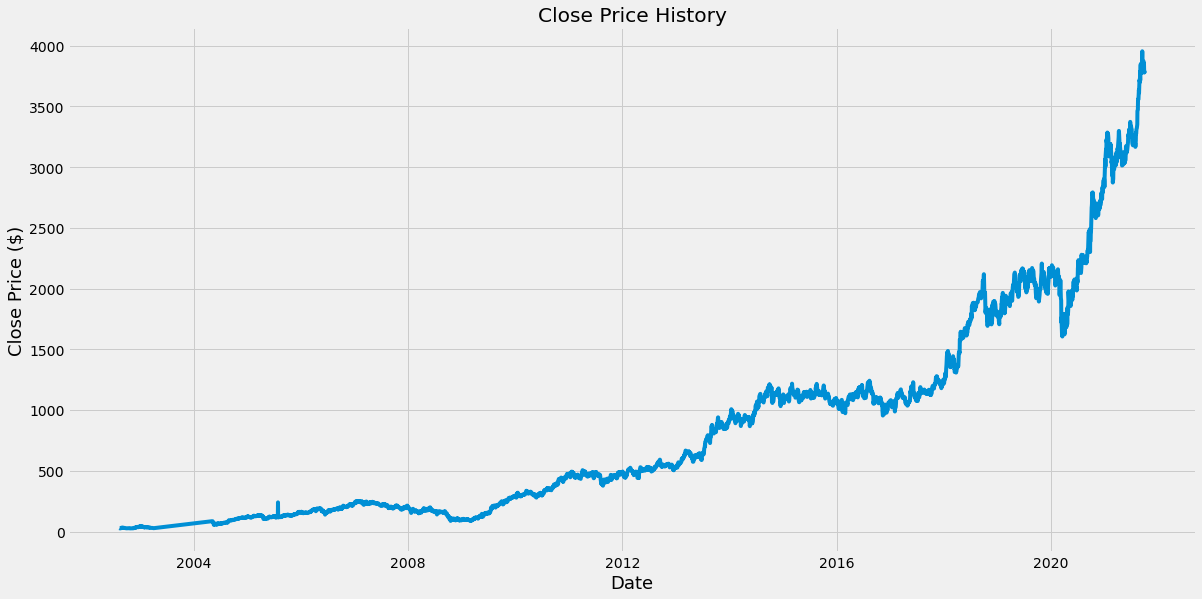

In [8]:
plt.figure(figsize=(18,9))
plt.title('Close Price History')

df["Date"] = pd.to_datetime(df["Date"])
date = df["Date"]

plt.plot(date,df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($)',fontsize=18)
plt.show()

In [7]:
data =  df.filter(['Close'])
#convert the dataframe to a numpy arrays
dataset = data.values
#get the number of rows to train the model
training_data_len = math.ceil( len(dataset) * .8)
training_data_len

3571

In [8]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[7.99743657e-04],
       [6.98000688e-04],
       [1.86923614e-04],
       ...,
       [9.55348155e-01],
       [9.58593939e-01],
       [9.53833468e-01]])

In [9]:
#create the training dataset
#create the scaled training dataset
train_data = scaled_data[0:training_data_len , :]
#split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([7.99743657e-04, 6.98000688e-04, 1.86923614e-04, 1.86923614e-04,
       1.70359834e-04, 0.00000000e+00, 1.86923614e-04, 5.25270854e-04,
       8.37600534e-04, 1.29188695e-03, 1.26349648e-03, 1.06474374e-03,
       1.07184597e-03, 1.07184597e-03, 1.62314361e-03, 1.70832086e-03,
       1.31318588e-03, 1.48827551e-03, 1.43858757e-03, 1.13572769e-03,
       1.03398667e-03, 1.03398667e-03, 1.23037329e-03, 1.27059240e-03,
       1.04344822e-03, 8.92019250e-04, 1.11443168e-03, 8.73091782e-04,
       8.09207148e-04, 6.86166226e-04, 5.60769385e-04, 3.14690940e-04,
       3.69113055e-04, 4.80317572e-04, 5.67862391e-04, 3.02862305e-04,
       2.43709902e-04, 2.43709902e-04, 4.30631088e-04, 3.85676834e-04,
       3.54915876e-04, 5.46568322e-04, 3.62010338e-04, 3.69113055e-04,
       5.18175421e-04, 4.66120879e-04, 4.66120879e-04, 4.80317572e-04,
       4.80317572e-04, 6.31747510e-04, 7.45322028e-04, 4.75587283e-04,
       4.42461665e-04, 3.17058027e-04, 1.72725464e-04, 7.09815242e-05,
     

In [10]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train.shape

(3511, 60)

In [12]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1] ,1))
x_train.shape

(3511, 60, 1)

In [11]:
#Build the lstm model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [14]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

3511/3511 [==============================] - 261s 70ms/step - loss: 1.6470e-04


In [16]:
#creating the testing data
test_data = scaled_data[training_data_len - 60: , :]
#create the datasets x_train and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [17]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [18]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [19]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

28/28 [==============================] - 6s 72ms/step


In [20]:
#Get the root mean squared error (RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

113.5563121846973

C:\Users\acer\AppData\Local\Temp\ipykernel_4984\4269411032.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


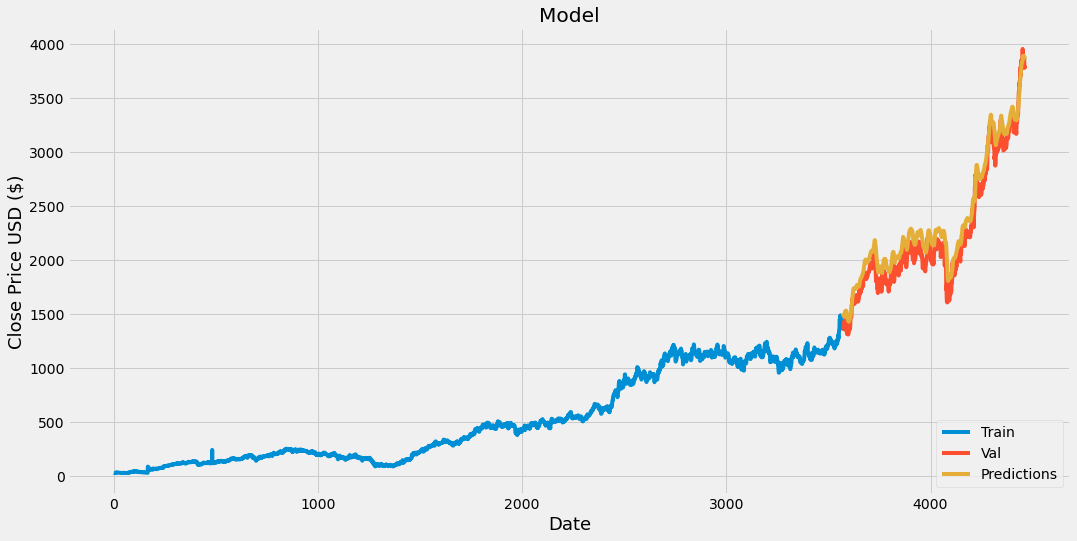

In [21]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualise
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [22]:
#show the valid and predicted prices
valid

,Close,Predictions
3571,1360.457153,1503.542358
3572,1363.805054,1494.397217
3573,1359.411255,1487.623047
3574,1369.245483,1482.207153
3575,1414.604004,1479.450562
...,...,...
4458,3871.300049,3883.213867
4459,3836.949951,3884.843750
4460,3779.149902,3881.732422
4461,3791.899902,3869.514648


In [23]:
tcs_quote = pd.read_csv('C:/Users/acer/Downloads/TCS_stock_history.csv')

In [26]:
new_df = tcs_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price - scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 74ms/step
[[0.97215927]]


## Hence, We explored Stock Price of TCS using LSTM. We then visualized closing price value after using LSTM.